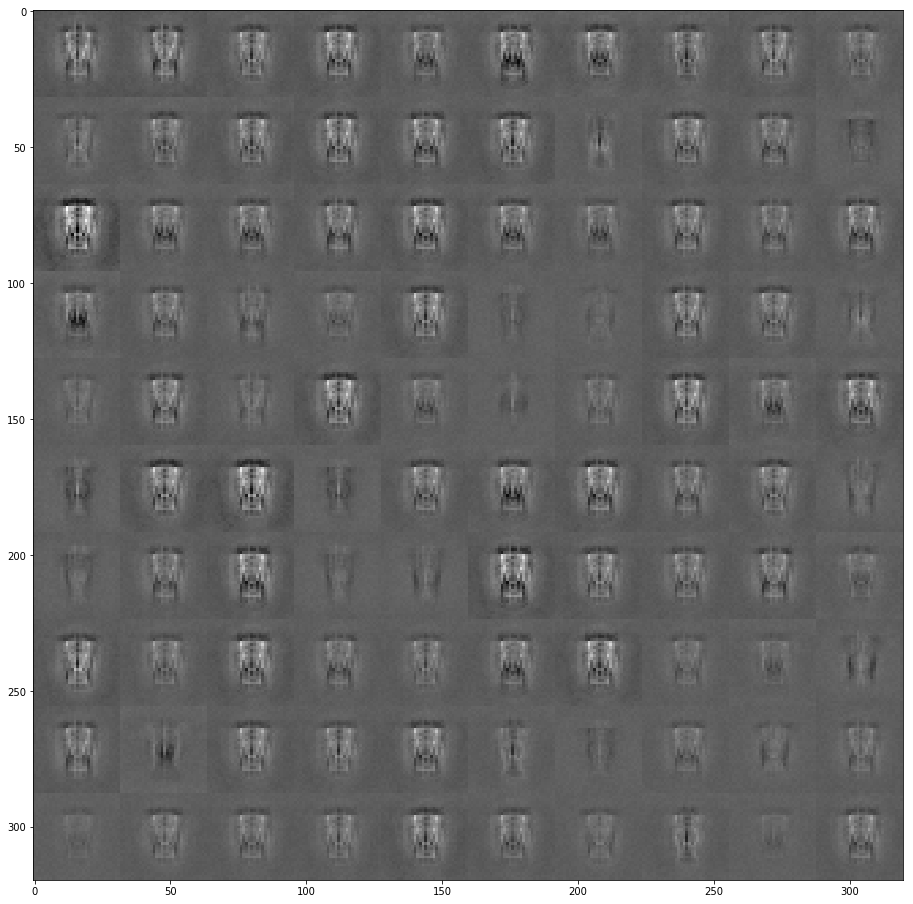

In [64]:
import torch
import os
from matplotlib import pyplot as plt
%matplotlib inline
seed = 0
n_hidden = 100
viewpoint_modulo = 1.0
epochs = 15
time = 15
lr = 0.005
lr_decay = 0.7
decay_memory = 10
update_interval = 250
params = [
    seed, n_hidden, viewpoint_modulo, epochs, time, lr, lr_decay, decay_memory, update_interval
]
model_name = '_'.join([str(x) for x in params])+'.pt'
snn = torch.load(os.path.join('.', 'results', 'params', 'vpr', 'two_layer_backprop', model_name))

weights = snn.connections['X', 'Y'].w.view(32, 32, -1).permute(2, 0, 1).view(10, 10, 32, 32)

sqrt = 32
w = torch.zeros(10*sqrt, 10*sqrt)
for i in range(10):
    for j in range(10):
        w[i*sqrt: (i+1)*sqrt, j*sqrt: (j+1)*sqrt] = weights[i,j]*(-1)

plt.figure(figsize=(16,16))
plt.imshow(w, cmap='Greys')